In [1]:
using Plots
using WebIO
using Statistics
using Interact

WebIO._IJuliaInit()

In [ ]:
using WebIO
WebIO.install_jupyter_nbextension()

In [ ]:
r = 2.2
area = π*r^2
circumference = π*2r # implicit multiplication

In [ ]:
@show π

In [ ]:
π

In [ ]:
x = 3
@show typeof(x)
y = 3.1
@show typeof(y)

Functions behave differently for different types

In [ ]:
x = 3
@show x*x
y = "3"
@show y*y

In [ ]:
# short syntax for simply functions
a(r) = π*r^2
# long syntax
""" Calculate area of circle with radius r"""
function A(r)
    a = π*r^2
    return a
end
# ?A returns docstring

In [ ]:
?A

IN JULIA EVERYTHING SHOULD BE A FUNCTION

In [ ]:
a = 5
if a < 4
    s = "small"
elseif a< 6
    s = "medium"
else 
    s = "large"
end
s

# Array Comprehensions

In [ ]:
factorials = [fact(n) for n in 1:21]

# appendingg arrays

In [ ]:
λ = 0.9 # decay rate
x = 20.0 # initial value
xs = [x]   # vector for storing time series
N = 100
for n in 1:N
    next_x = λ*x
    push!(xs,next_x)
    x = next_x
end

In [ ]:
plot(xs)

# Anonymous Functions

In [ ]:
f(λ) = x -> λ*x

In [ ]:
f(3)

In [ ]:
f(3)*2

In [ ]:
"""
Simulate growth with rate λ ic x0 and time N
"""
function growth(λ = 0.9, x0 = 10.0, N = 100)
    x = zeros(N+1)
    x[1] = x0
    
    for n in 1:N
        x[n+1] = λ*x[n]
    end
    
    return x
end

"""
Plot growth trajectory
"""
function plot_growth(λ, x0, N)
    plot(growth(λ,x0,N))
end

In [ ]:
growth( ; λ =:0.5, x0 =:100, N =:100) # why this giving an error?????

In [ ]:
@manipulate for λ in 0.1:0.1:2.0, x0 in 0:20
    plot_growth(λ,x0,100)
end

In [28]:
@enum InfectionStatus S I R

In [ ]:
x = S

In [ ]:
x = R

In [ ]:
Int(x)

In [ ]:
N = 100
agents = [S for n in 1:N]

In [ ]:
agents[Int(round(rand()*N))] = I

In [ ]:
function step!(agents::Vector, p)
    n = [a for a in 1:N]
    i = rand(n)
    
    if agents[i] != I
        return
    else
        deleteat!(n,i)
        j = rand(n)
        @show j
        if rand() > p
            agents[j] = I
        end
    end
end
        

In [ ]:
for i in 1:1000
    step!(agents,0.1)
end

In [ ]:
sum([Int(agent.status) for agent in agents])

In [ ]:
n = [n for n in 1:100]

In [29]:
mutable struct Agent
    status::InfectionStatus
    num_infected::Int
    function Agent(status::InfectionStatus=S, num_infected::Int=10)
        new(status, num_infected)
    end
end

In [30]:
function step!(agents::Vector{Agent}, p::Float64)
    N = length(agents)
    n = [a for a in 1:N]
    i = rand(n)
    
    if agents[i].status != I
        return
    else
        deleteat!(n,i)
        j = rand(n)
        #@show j
        if rand() > p
            agents[j].status = I
            agents[i].num_infected += 1
        end
    end
end

function sweep!(agents::Vector{Agent}, p::Float64)
    N = length(agents)
    for k in 1:N
        step!(agents, p)
        #@show agents
    end
end

function infection_simulation(N::Int, p::Float64, T::Int)
    agents = [Agent() for i in 1:N]
    agents[rand(1:N)].status = I
    num_I = zeros(T)
    for i in 2:T
        sweep!(agents, p)
        num_I[i] = sum([Int(agent.status) for agent in agents])
    end
    return num_I
end
        

infection_simulation (generic function with 1 method)

In [31]:
results = [infection_simulation(100,.98,1000)]
for k in 1:50
    r = infection_simulation(100,.98,1000)
    push!(results, r)
end

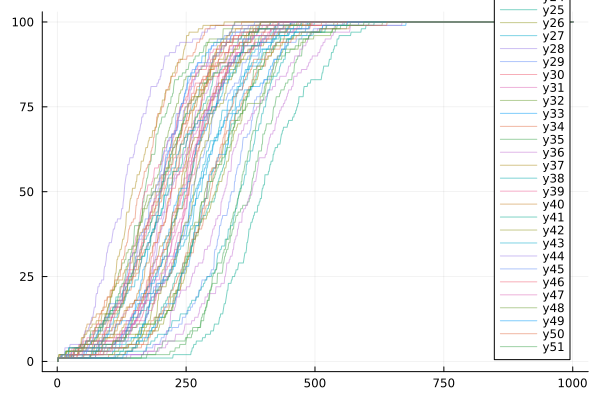

In [32]:
plot(results, alpha=0.5)

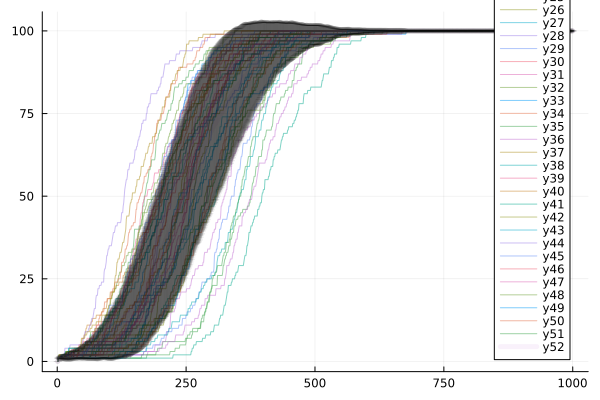

In [33]:
plot!(mean(results), linewidth=5, yerr=std(results), alpha = 0.1)

In [ ]:
plot!(yerr = std(results))

# PSET 4

In [2]:
abstract type AbstractWalker end

abstract type AbstractWalker2D <: AbstractWalker end


struct Location
    x
    y
end



In [38]:
mutable struct Walker2D <: AbstractWalker2D
    position::Location
    
    function Walker2D(x::Float64=0.0, y::Float64=0.0)
        new(Location(x,y))
    end
    
    function Walker2D(x::Int=0, y::Int=0)
        new(Location(x,y))
    end
end

In [19]:
function make_tuple(l::Location)
    return (l.x,l.y)
end

function make_tuple(vl::Vector{Location})
    return [(l.x,l.y) for l in vl]
end

function pos(walker::AbstractWalker2D)
    return walker.position
end

function set_pos!(walker::AbstractWalker2D, l::Location)
    walker.position = l
end

function jump(walker::AbstractWalker2D)
    options = (-1,0,1)
    x = walker.position.x + rand(options)
    y = walker.position.y + rand(options)
    return Location(x,y)
end

function jump!(walker::AbstractWalker2D)
    set_pos!(walker, jump(walker))
end

function trajectory(N::Int)
    walker = Walker2D()
    traj = [walker.position]
    for i in 1:N
        jump!(walker)
        push!(traj, walker.position)
    end
    return traj
end
        

trajectory (generic function with 1 method)

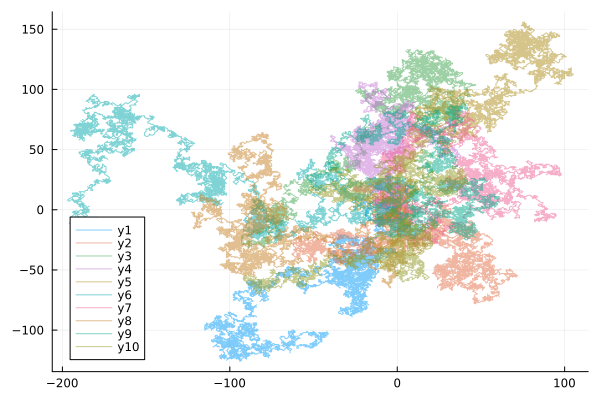

In [37]:
traj = trajectory(10000)
plot(make_tuple(traj), alpha = 0.5)

plot!(make_tuple(trajectory(10000)), alpha = 0.5)
plot!(make_tuple(trajectory(10000)), alpha = 0.5)
plot!(make_tuple(trajectory(10000)), alpha = 0.5)
plot!(make_tuple(trajectory(10000)), alpha = 0.5)
plot!(make_tuple(trajectory(10000)), alpha = 0.5)
plot!(make_tuple(trajectory(10000)), alpha = 0.5)
plot!(make_tuple(trajectory(10000)), alpha = 0.5)
plot!(make_tuple(trajectory(10000)), alpha = 0.5)
plot!(make_tuple(trajectory(10000)), alpha = 0.5)



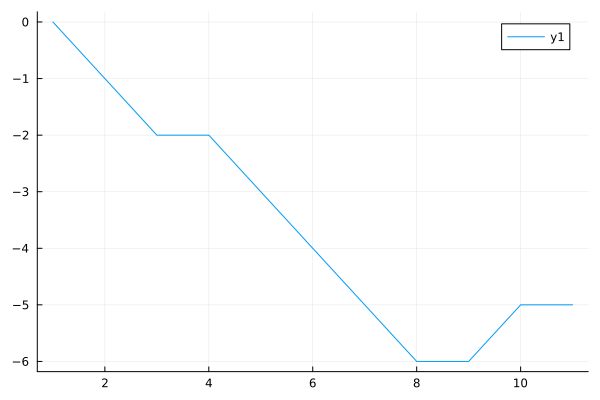

In [6]:
x_vec = [l.x for l in traj]
y_vec = [l.y for l in traj]
plot(x_vec)

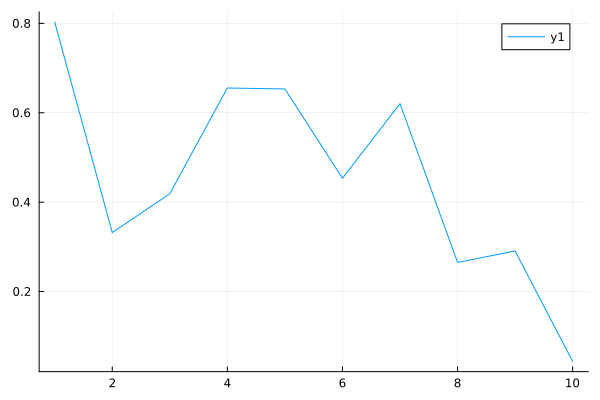

In [7]:
plot(rand(10))